# Exploration des données

Importation des bibliothèques

In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.notebook import *

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Importation des données

In [123]:
df=pd.read_csv("mars-2014-complete.csv",encoding='ISO-8859-1', sep = ';')

Dimension des données

In [124]:
# Dimensions du DataFrame
print("Dimensions (lignes, colonnes) :", df.shape)

Dimensions (lignes, colonnes) : (55044, 30)


Infos sur le dataframe

In [125]:
display(df.head())
display(df.info())

# Nous avons 5 variables de type float64, 3 de type int64 et 22 de type object


,lib_mrq,lib_mod_doss,lib_mod,dscom,cnit,tvv,cod_cbr,hybride,puiss_admin_98,puiss_max,...,masse_ordma_min,masse_ordma_max,champ_v9,date_maj,Carrosserie,gamme,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000G340,939AXN1B52C,ES,non,12,147,...,1505,1505,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
1,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000H341,939BXN1B53C,ES,non,12,147,...,1555,1555,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000E302,939AXR1B64,GO,non,7,100,...,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
3,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000F303,939AXR1B64B,GO,non,7,100,...,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),M10ALFVP000G304,939AXS1B66,GO,non,9,125,...,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55044 entries, 0 to 55043
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   lib_mrq            55044 non-null  object 
 1   lib_mod_doss       55044 non-null  object 
 2   lib_mod            55044 non-null  object 
 3   dscom              55044 non-null  object 
 4   cnit               55044 non-null  object 
 5   tvv                55044 non-null  object 
 6   cod_cbr            55044 non-null  object 
 7   hybride            55044 non-null  object 
 8   puiss_admin_98     55044 non-null  int64  
 9   puiss_max          55044 non-null  object 
 10  typ_boite_nb_rapp  55044 non-null  object 
 11  conso_urb          55001 non-null  object 
 12  conso_exurb        55001 non-null  object 
 13  conso_mixte        55010 non-null  object 
 14  co2                55010 non-null  float64
 15  co_typ_1           54886 non-null  object 
 16  hc                 977

None

On supprimer les 4 dernières colonnes qui sont vides

In [126]:
df = df.iloc[:, :-4]
df.head()

,lib_mrq,lib_mod_doss,lib_mod,dscom,cnit,tvv,cod_cbr,hybride,puiss_admin_98,puiss_max,...,hc,nox,hcnox,ptcl,masse_ordma_min,masse_ordma_max,champ_v9,date_maj,Carrosserie,gamme
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000G340,939AXN1B52C,ES,non,12,147,...,"0,052000001","0,032000002",NaN,"0,002",1505,1505,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER
1,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000H341,939BXN1B53C,ES,non,12,147,...,"0,052000001","0,032000002",NaN,"0,002",1555,1555,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000E302,939AXR1B64,GO,non,7,100,...,NaN,"0,149000004","0,174999997","0,001",1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER
3,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000F303,939AXR1B64B,GO,non,7,100,...,NaN,"0,149000004","0,174999997","0,001",1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),M10ALFVP000G304,939AXS1B66,GO,non,9,125,...,NaN,"0,164000005","0,193000004","0,001",1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER


Type et pourcentage de Nan 

In [127]:
# On créé un dataframe dans lequel est stocké le type et le pourcentage de Nan de chaque variable
infos_donnees = pd.DataFrame({
    "Type": df.dtypes,
    "Pourcentage Manquant (%)": (df.isnull().sum() / len(df)) * 100
})
display(infos_donnees)
# Certaines données ne sont pas du bon type

,Type,Pourcentage Manquant (%)
lib_mrq,object,0.000000
lib_mod_doss,object,0.000000
lib_mod,object,0.000000
dscom,object,0.000000
cnit,object,0.000000
tvv,object,0.000000
cod_cbr,object,0.000000
hybride,object,0.000000
puiss_admin_98,int64,0.000000
puiss_max,object,0.000000


Nous avons 22 variables de type object, nous allons regarder en combien de catégories sont divisées
ces variables.

In [128]:
# On récupère les colonnes de type Object
colonnes_object = df.select_dtypes(include='object')
# On calcule le nombre de modalité de chacune de ces variables
categories_uniques = colonnes_object.nunique()
print(categories_uniques)


lib_mrq                 46
lib_mod_doss           483
lib_mod                434
dscom                 3837
cnit                 54982
tvv                  35430
cod_cbr                 13
hybride                  2
puiss_max              232
typ_boite_nb_rapp       19
conso_urb              198
conso_exurb             89
conso_mixte            137
co_typ_1               606
hc                      74
nox                    222
hcnox                  209
ptcl                     9
champ_v9                35
date_maj                 5
Carrosserie             11
gamme                    7
dtype: int64


Suppression des variables qui ne nous interessent pas

In [129]:
to_drop = ["cnit", "tvv", "hc", "hcnox", "date_maj"]
df_clear = df.drop(to_drop, axis = 1)


Avoir un aperçu de ce à quoi ressemble les catégories de certaines variables catégorielles

In [130]:
display('Marque des voitures', df_clear['lib_mrq'].unique())
display('Gamme des voitures', df_clear['gamme'].unique())
display('Type de voiture', df_clear['hybride'].unique())

# Dimensions du DataFrame
print("Dimensions (lignes, colonnes) :", df_clear.shape)

'Marque des voitures'

array(['ALFA-ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW', 'CADILLAC',
       'CHEVROLET', 'CITROEN', 'DACIA', 'FERRARI', 'FIAT', 'FORD',
       'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP', 'KIA', 'LADA',
       'LAMBORGHINI', 'LANCIA', 'LAND ROVER', 'LEXUS', 'LOTUS',
       'MASERATI', 'MAZDA', 'MERCEDES', 'MIA', 'MINI', 'MITSUBISHI',
       'NISSAN', 'OPEL', 'PEUGEOT', 'PORSCHE', 'RENAULT', 'ROLLS-ROYCE',
       'SEAT', 'SKODA', 'SMART', 'SSANGYONG', 'SUBARU', 'SUZUKI', 'TESLA',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO'], dtype=object)

'Gamme des voitures'

array(['MOY-SUPER', 'LUXE', 'MOY-INFER', 'INFERIEURE', 'SUPERIEURE',
       'ECONOMIQUE', 'MOY-INFERIEURE'], dtype=object)

'Type de voiture'

array(['non', 'oui'], dtype=object)

Dimensions (lignes, colonnes) : (55044, 21)


Suppression des Nan

In [131]:
df_without_Na = df_clear.dropna()
# Dimensions du DataFrame
print("Dimensions (lignes, colonnes) :", df_without_Na.shape)
display(df_without_Na.head())


Dimensions (lignes, colonnes) : (52362, 21)


,lib_mrq,lib_mod_doss,lib_mod,dscom,cod_cbr,hybride,puiss_admin_98,puiss_max,typ_boite_nb_rapp,conso_urb,...,conso_mixte,co2,co_typ_1,nox,ptcl,masse_ordma_min,masse_ordma_max,champ_v9,Carrosserie,gamme
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),ES,non,12,147,M 6,"11,30000019",...,"7,800000191",182.0,"0,647000015","0,032000002","0,002",1505,1505,715/2007*692/2008EURO5,BERLINE,MOY-SUPER
1,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),ES,non,12,147,M 6,"11,5",...,8,186.0,"0,647000015","0,032000002","0,002",1555,1555,715/2007*692/2008EURO5,BERLINE,MOY-SUPER
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),GO,non,7,100,M 6,"6,599999905",...,"5,099999905",134.0,"0,066","0,149000004","0,001",1565,1565,715/2007*692/2008EURO5,BERLINE,MOY-SUPER
3,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),GO,non,7,100,M 6,"6,599999905",...,"5,099999905",134.0,"0,066","0,149000004","0,001",1565,1565,715/2007*692/2008EURO5,BERLINE,MOY-SUPER
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),GO,non,9,125,M 6,"6,900000095",...,"5,300000191",139.0,"0,059999999","0,164000005","0,001",1565,1565,715/2007*692/2008EURO5,BERLINE,MOY-SUPER


On change le type de certaines variables

In [132]:
quantitative_col = ["co2","puiss_admin_98","puiss_max","conso_urb","conso_exurb","conso_mixte","co_typ_1","nox","ptcl","masse_ordma_min","masse_ordma_max"]
df_quantitative = df_without_Na[quantitative_col]

for name in df_quantitative:
    # Remplacement des virgules par des points et changement de type
    df_without_Na[name] = pd.to_numeric(df_without_Na[name].astype(str).str.replace(',', '.'), errors = 'coerce')

    df_quantitative[name] = pd.to_numeric(df_without_Na[name].astype(str).str.replace(',', '.'), errors = 'coerce')


# Vérification des types
print(df_without_Na.dtypes)

print("Dimensions (lignes, colonnes) :", df_without_Na.shape)


lib_mrq               object
lib_mod_doss          object
lib_mod               object
dscom                 object
cod_cbr               object
hybride               object
puiss_admin_98         int64
puiss_max            float64
typ_boite_nb_rapp     object
conso_urb            float64
conso_exurb          float64
conso_mixte          float64
co2                  float64
co_typ_1             float64
nox                  float64
ptcl                 float64
masse_ordma_min        int64
masse_ordma_max        int64
champ_v9              object
Carrosserie           object
gamme                 object
dtype: object
Dimensions (lignes, colonnes) : (52362, 21)


On regarde le nombre de catégories pour les variables catégorielles qui reste

In [133]:
# On récupère les colonnes de type Object
colonnes_object = df_without_Na.select_dtypes(include='object')
# On calcule le nombre de modalité de chacune de ces variables
categories_uniques = colonnes_object.nunique()
print(categories_uniques)

display('Type de voiture', df_clear['hybride'].unique())




lib_mrq                41
lib_mod_doss          384
lib_mod               356
dscom                3122
cod_cbr                 7
hybride                 2
typ_boite_nb_rapp      14
champ_v9               34
Carrosserie            11
gamme                   7
dtype: int64


'Type de voiture'

array(['non', 'oui'], dtype=object)

# Correlation

Voir les variables les plus corrélées à C02

In [134]:
# Calcul des corrélations
correlations = df_quantitative.corr()['co2']

# Trier par valeur absolue (pour voir les plus fortes corrélations)
correlations_sorted = correlations.abs().sort_values(ascending=False)

# Afficher les résultats
print("Variables les plus corrélées à la cible :")
print(correlations_sorted)

Variables les plus corrélées à la cible :
co2                1.000000
conso_mixte        0.980428
conso_exurb        0.962510
conso_urb          0.912686
masse_ordma_min    0.704913
masse_ordma_max    0.605523
nox                0.314735
puiss_admin_98     0.306235
ptcl               0.240434
co_typ_1           0.195858
puiss_max          0.151387
Name: co2, dtype: float64


Heatmap des variables quantitatives

<Axes: >

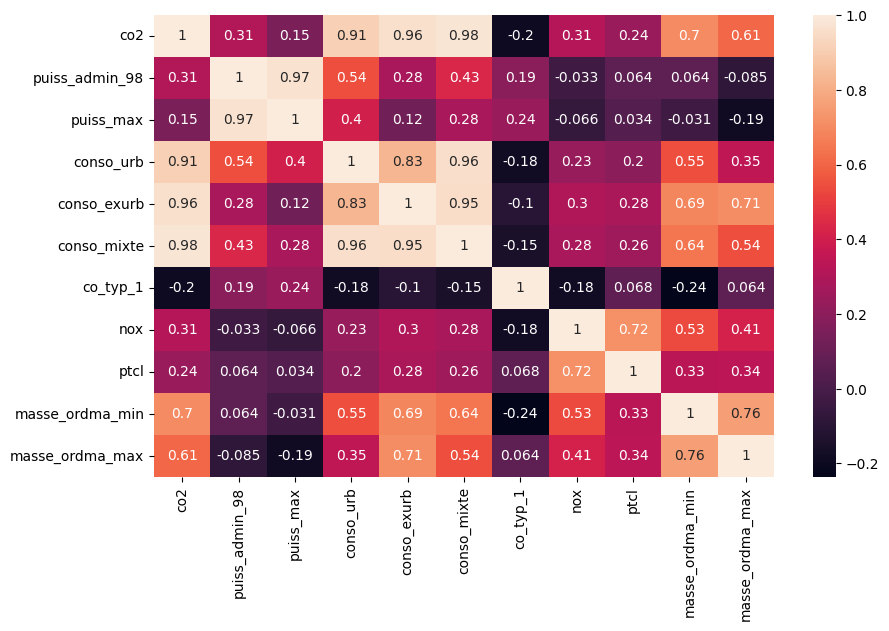

In [135]:
cor = df_quantitative.corr()
plt.figure(figsize = (10, 6))
sns.heatmap(cor, annot = True)

# Graphes

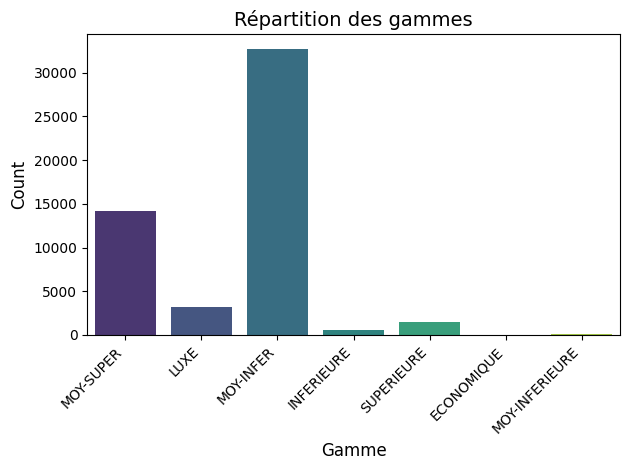

In [136]:
sns.countplot(data=df_without_Na, x ='gamme', palette="viridis")
plt.xticks(rotation=45, fontsize=10, ha='right')  
plt.xlabel('Gamme', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Répartition des gammes', fontsize=14) 
plt.tight_layout()
plt.show()

# On voit qu'il y a 2 classes "moyenne inférieure"

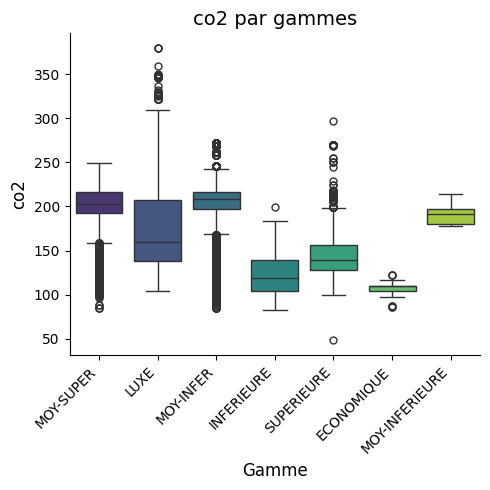

In [137]:

sns.catplot(data=df_without_Na, x='gamme', y='co2', kind='box', palette="viridis" )
plt.xticks(rotation=45, fontsize=10, ha='right')  
plt.xlabel('Gamme', fontsize=12)
plt.ylabel('co2', fontsize=12)
plt.title('co2 par gammes', fontsize=14) 
plt.tight_layout()

plt.show()



In [138]:
df_without_Na['gamme'] = df_without_Na['gamme'].replace('MOY-INFERIEURE', 'MOY-INFER')


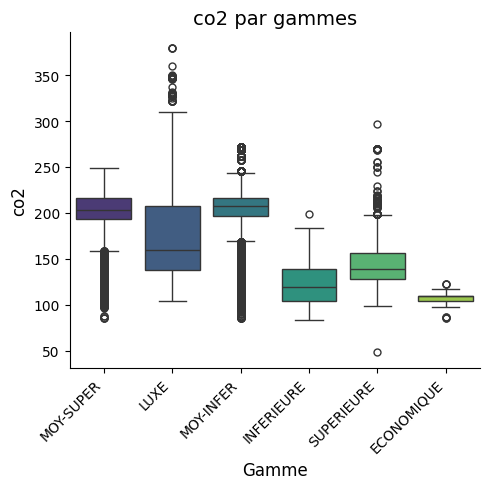

In [139]:
sns.catplot(data=df_without_Na, x='gamme', y='co2', kind='box', palette="viridis" )
plt.xticks(rotation=45, fontsize=10, ha='right')  
plt.xlabel('Gamme', fontsize=12)
plt.ylabel('co2', fontsize=12)
plt.title('co2 par gammes', fontsize=14) 
plt.tight_layout()

plt.show()


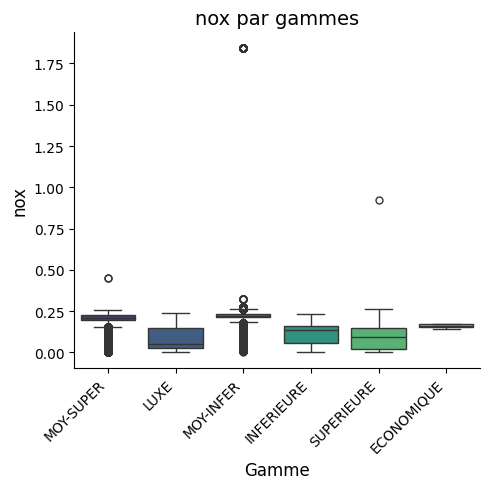

In [140]:
sns.catplot(data=df_without_Na, x='gamme', y='nox', kind='box', palette="viridis" )
plt.xticks(rotation=45, fontsize=10, ha='right')  
plt.xlabel('Gamme', fontsize=12)
plt.ylabel('nox', fontsize=12)
plt.title('nox par gammes', fontsize=14) 
plt.tight_layout()

plt.show()

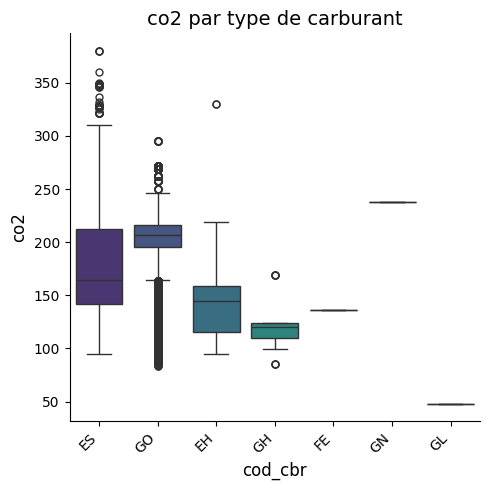

In [141]:
sns.catplot(data=df_without_Na, x='cod_cbr', y='co2', kind='box', palette="viridis")
plt.xticks(rotation=45, fontsize=10, ha='right')  
plt.xlabel('cod_cbr', fontsize=12)
plt.ylabel('co2', fontsize=12)
plt.title('co2 par type de carburant', fontsize=14) 
plt.tight_layout()
plt.show()

In [142]:
carb_counts = df_without_Na['cod_cbr'].value_counts()
print(carb_counts)

# Etant donné le peu de données sur les carburants GN, FE, GL et que ceux ci ne sont pas connus dans les abréviation courantes
# On peut peut etre s'en séparer
# EH : essence/électricité (hybride non rechargeable) 
# GH : gasoil/électricité (hybride non rechargeable) 
# GN : gaz naturel


cod_cbr
GO    49287
ES     2775
EH      208
GH       81
GN        8
FE        2
GL        1
Name: count, dtype: int64


Regroupement des carburants

In [143]:
# on initialise une colonne vide 'carburant'
df_without_Na['carburant'] = None 


df_without_Na.loc[df_without_Na['cod_cbr'].str.startswith('GO'), 'carburant'] = 'Gazoil'

df_without_Na.loc[df_without_Na['cod_cbr'].str.startswith('ES'), 'carburant'] = 'Essence'

df_without_Na.loc[df_without_Na['cod_cbr'].str.startswith('GH'), 'carburant'] = 'Gasoil/Elec'

df_without_Na.loc[df_without_Na['cod_cbr'].str.startswith('EH'), 'carburant'] = 'Essence/Elec'

# On supprime les données qui contiennent des Na au niveau des carburant ()
df_without_Na = df_without_Na.dropna(subset=['carburant'])

carb_filt_counts = df_without_Na['carburant'].value_counts()
print(carb_filt_counts)

carburant
Gazoil          49287
Essence          2775
Essence/Elec      208
Gasoil/Elec        81
Name: count, dtype: int64


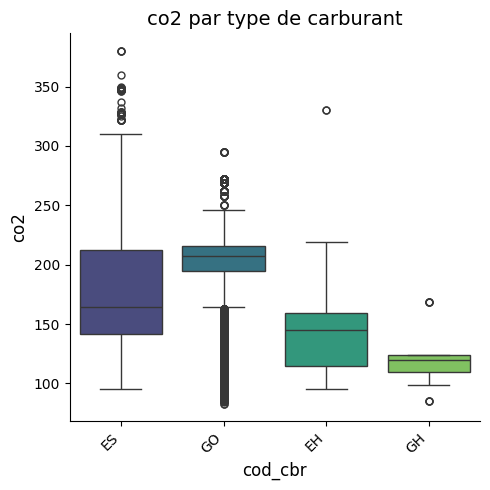

In [144]:
sns.catplot(data=df_without_Na, x='cod_cbr', y='co2', kind='box', palette="viridis")
plt.xticks(rotation=45, fontsize=10, ha='right')  
plt.xlabel('cod_cbr', fontsize=12)
plt.ylabel('co2', fontsize=12)
plt.title('co2 par type de carburant', fontsize=14) 
plt.tight_layout()
plt.show()

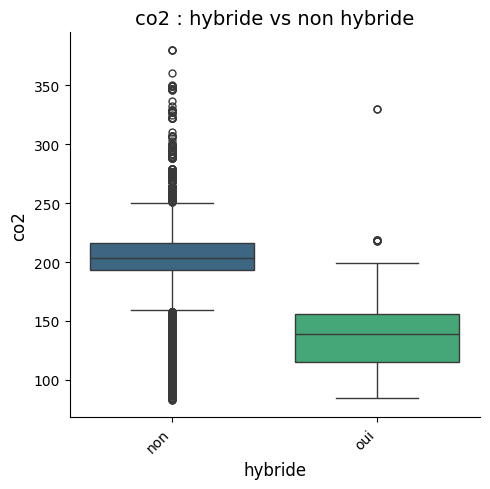

In [145]:
sns.catplot(data=df_without_Na, x='hybride', y='co2', kind='box', palette="viridis")
plt.xticks(rotation=45, fontsize=10, ha='right')  
plt.xlabel('hybride', fontsize=12)
plt.ylabel('co2', fontsize=12)
plt.title('co2 : hybride vs non hybride', fontsize=14) 
plt.tight_layout()
plt.show()

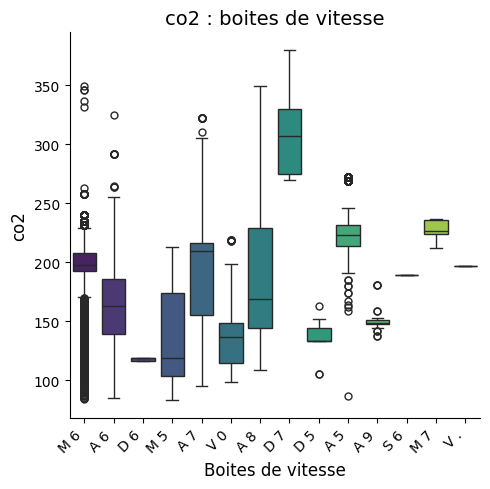

In [146]:

sns.catplot(data=df_without_Na, x='typ_boite_nb_rapp', y='co2', kind='box', palette="viridis")
plt.xticks(rotation=45, fontsize=10, ha='right')  
plt.xlabel('Boites de vitesse', fontsize=12)
plt.ylabel('co2', fontsize=12)
plt.title('co2 : boites de vitesse', fontsize=14) 
plt.tight_layout()
plt.show()

# Rassembler les boites manuelles et automatiques

In [147]:
boite_counts = df_without_Na['typ_boite_nb_rapp'].value_counts()
print(df_without_Na['typ_boite_nb_rapp'].unique())
print(boite_counts)

V_0_marque = df_without_Na[df_without_Na["typ_boite_nb_rapp"] == "V 0"]["lib_mrq"]
print(V_0_marque.value_counts())

V_0_gamme = df_without_Na[df_without_Na["typ_boite_nb_rapp"] == "V 0"]["gamme"]
print(V_0_gamme.value_counts())

V_0_hyb = df_without_Na[df_without_Na["typ_boite_nb_rapp"] == "V 0"]["hybride"]
print(V_0_hyb.value_counts())


['M 6' 'A 6' 'D 6' 'M 5' 'A 7' 'V 0' 'A 8' 'D 7' 'D 5' 'A 5' 'A 9' 'S 6'
 'M 7' 'V .']
typ_boite_nb_rapp
M 6    31427
A 5    12352
A 7     6611
A 6      662
M 5      505
A 8      503
V 0      193
A 9       35
D 7       21
M 7       20
D 5       14
D 6        6
S 6        1
V .        1
Name: count, dtype: int64
lib_mrq
LEXUS     145
AUDI       43
NISSAN      4
SUBARU      1
Name: count, dtype: int64
gamme
LUXE          133
MOY-SUPER      54
SUPERIEURE      3
INFERIEURE      3
Name: count, dtype: int64
hybride
oui    145
non     48
Name: count, dtype: int64


Regroupement des boites de vitesse

In [148]:
df_without_Na['boite_vitesse'] = None 


df_without_Na.loc[df_without_Na['typ_boite_nb_rapp'].str.startswith('M'), 'boite_vitesse'] = 'Manuelle'

df_without_Na.loc[df_without_Na['typ_boite_nb_rapp'].str.startswith('A'), 'boite_vitesse'] = 'Auto'

df_without_Na = df_without_Na.dropna(subset=['boite_vitesse'])

boite_filt_counts = df_without_Na['boite_vitesse'].value_counts()
print(boite_filt_counts)


boite_vitesse
Manuelle    31952
Auto        20163
Name: count, dtype: int64


Regroupement nombre rapports

In [149]:
df_without_Na['nbr_vitesse'] = None 

list_vitesse = ['5', '6', '7', '8', '9']

for i in list_vitesse:
    df_without_Na.loc[df_without_Na['typ_boite_nb_rapp'].str.contains(i), 'nbr_vitesse'] = i

df_without_Na = df_without_Na.dropna(subset=['nbr_vitesse'])
rapport_counts = df_without_Na['nbr_vitesse'].value_counts()
print(rapport_counts)



nbr_vitesse
6    32089
5    12857
7     6631
8      503
9       35
Name: count, dtype: int64


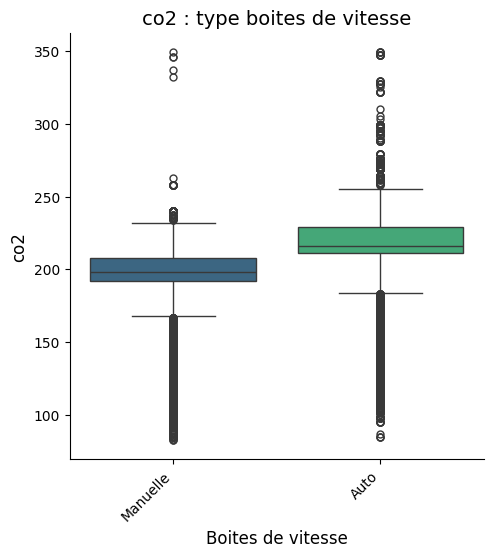

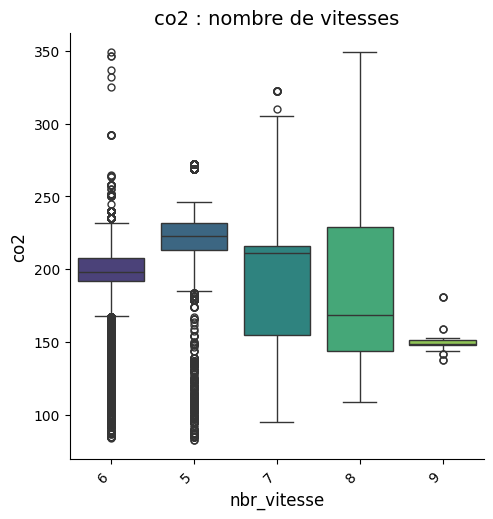

In [150]:

sns.catplot(data=df_without_Na, x='boite_vitesse', y='co2', kind='box', palette="viridis")
plt.xticks(rotation=45, fontsize=10, ha='right')  
plt.xlabel('Boites de vitesse', fontsize=12)
plt.ylabel('co2', fontsize=12)
plt.title('co2 : type boites de vitesse', fontsize=14) 

sns.catplot(data=df_without_Na, x='nbr_vitesse', y='co2', kind='box', palette="viridis")
plt.xticks(rotation=45, fontsize=10, ha='right')  
plt.xlabel('nbr_vitesse', fontsize=12)
plt.ylabel('co2', fontsize=12)
plt.title('co2 : nombre de vitesses', fontsize=14) 

plt.show()

Voir le lien entre le nombre de vitesse et la gamme de la voiture

In [151]:
# Créer un tableau de contingence
cont_tab = pd.crosstab(df_without_Na['nbr_vitesse'], df_without_Na['gamme'])

display(cont_tab)

gamme,ECONOMIQUE,INFERIEURE,LUXE,MOY-INFER,MOY-SUPER,SUPERIEURE
nbr_vitesse,,,,,,
5,28,254,12,5759,6789,15
6,7,319,570,23229,7264,700
7,0,26,2166,3783,91,565
8,0,0,301,28,21,153
9,0,0,26,0,9,0


On regarde comment sont répartis les Na de la variables ptcl

In [152]:


na_counts = df.groupby('lib_mrq')['ptcl'].apply(lambda x: x.isna().sum()).reset_index()


# Trier par ordre décroissant
na_counts = na_counts.sort_values(by='ptcl', ascending=False)

print(na_counts)




         lib_mrq  ptcl
26      MERCEDES  1303
10          FIAT   228
31          OPEL   154
0     ALFA-ROMEO   108
22         LEXUS   107
1   ASTON MARTIN    78
43        TOYOTA    57
7        CITROEN    54
38         SMART    48
6      CHEVROLET    41
44    VOLKSWAGEN    38
32       PEUGEOT    36
19   LAMBORGHINI    35
30        NISSAN    33
20        LANCIA    33
12         HONDA    32
16          JEEP    25
34       RENAULT    24
23         LOTUS    21
28          MINI    21
41        SUZUKI    19
17           KIA    15
37         SKODA    14
3        BENTLEY    14
11          FORD    13
27           MIA    13
8          DACIA    12
40        SUBARU    11
45         VOLVO    11
13       HYUNDAI    10
29    MITSUBISHI    10
25         MAZDA     9
14      INFINITI     9
36          SEAT     8
24      MASERATI     7
18          LADA     6
5       CADILLAC     6
4            BMW     6
9        FERRARI     4
2           AUDI     3
42         TESLA     2
21    LAND ROVER     0
15        J

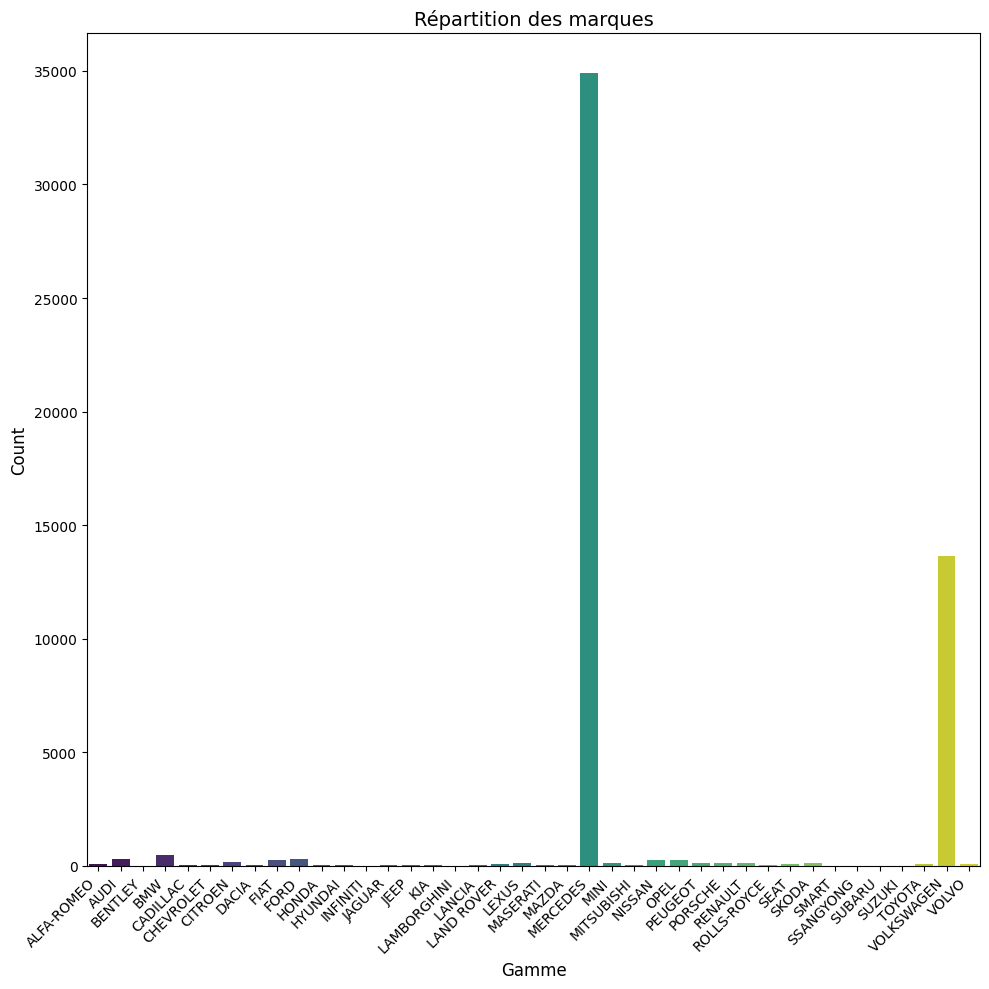

In [153]:
plt.figure(figsize=(10,10))
sns.countplot(data=df_without_Na, x ='lib_mrq', palette="viridis")
plt.xticks(rotation=45, fontsize=10, ha='right')  
plt.xlabel('Gamme', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Répartition des marques', fontsize=14) 
plt.tight_layout()
plt.show()

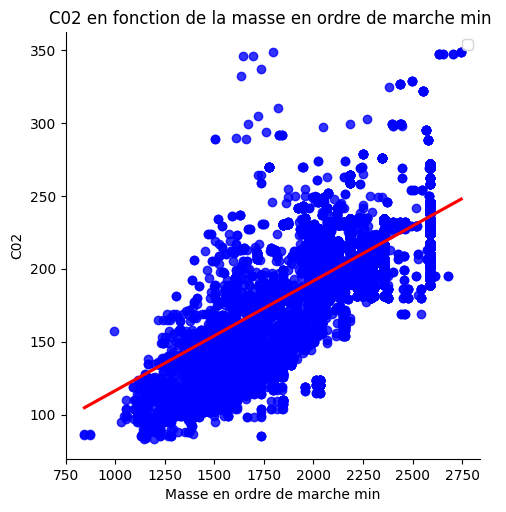

In [154]:
sns.lmplot(
    x="masse_ordma_min", 
    y="co2", 
    data=df_without_Na, 
    scatter_kws={"color": "blue"},  # Points en bleu
    line_kws={"color": "red"}  # Droite en rouge
)
plt.legend();
plt.title('C02 en fonction de la masse en ordre de marche min ');
plt.xlabel('Masse en ordre de marche min');
plt.ylabel('C02');

plt.show()


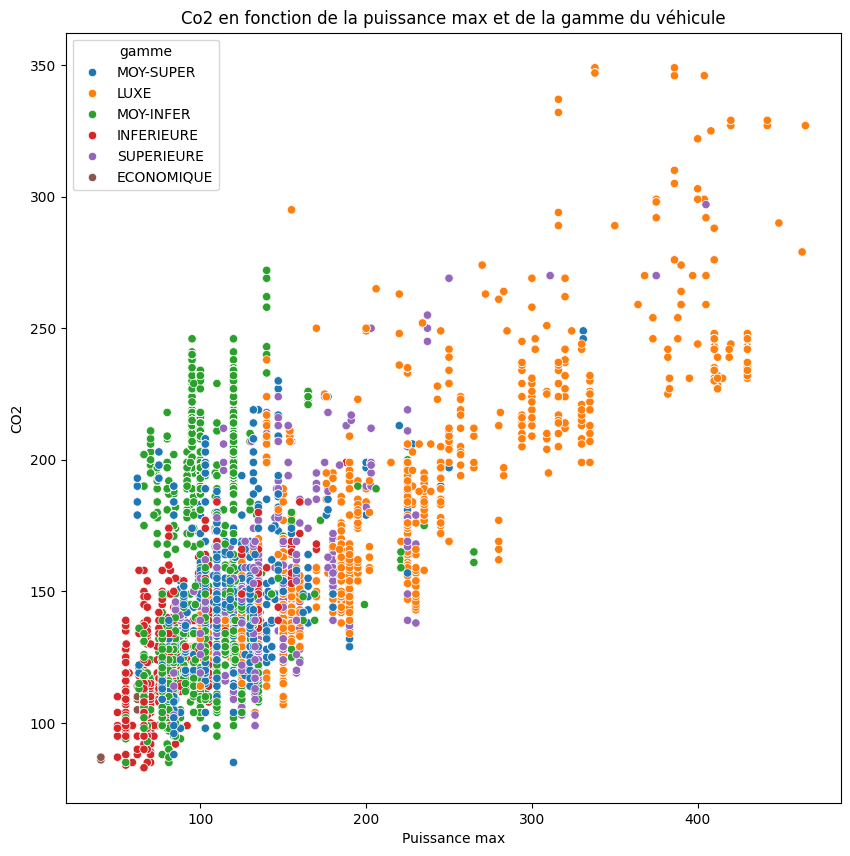

In [155]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="puiss_max", y="co2", data=df_without_Na, hue="gamme")
plt.xlabel("Puissance max")
plt.ylabel("CO2")
plt.title("Co2 en fonction de la puissance max et de la gamme du véhicule")

plt.show()


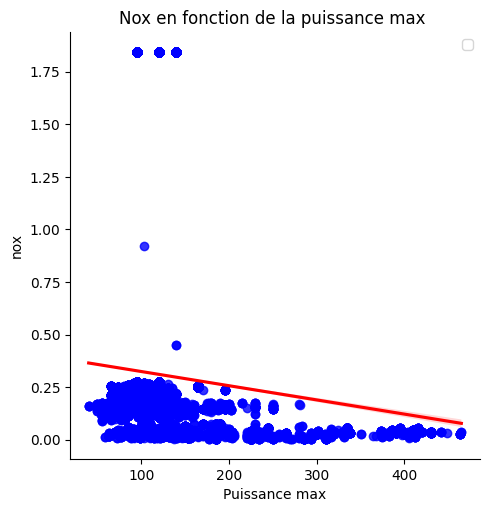

In [156]:
sns.lmplot(
    x="puiss_max", 
    y="nox", 
    data=df_without_Na, 
    scatter_kws={"color": "blue"},  # Points en bleu
    line_kws={"color": "red"}  # Droite en rouge
)
plt.legend();
plt.title('Nox en fonction de la puissance max ');
plt.xlabel('Puissance max');
plt.ylabel('nox');

plt.show()

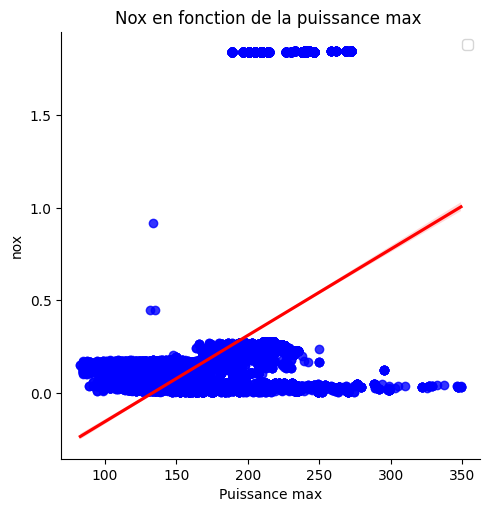

In [157]:
sns.lmplot(
    x="co2", 
    y="nox", 
    data=df_without_Na, 
    scatter_kws={"color": "blue"},  # Points en bleu
    line_kws={"color": "red"}  # Droite en rouge
)
plt.legend();
plt.title('Nox en fonction de la puissance max ');
plt.xlabel('Puissance max');
plt.ylabel('nox');

plt.show()

# Création des étiquettes de consommation

In [158]:
bins = [0, 100, 120, 140, 160, 200, 250, float('inf')]
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

df_without_Na['etiquette'] = pd.cut(df_without_Na['co2'], bins=bins, labels=labels, right=True)

# Vérification des résultats
display(df_without_Na.head())

,lib_mrq,lib_mod_doss,lib_mod,dscom,cod_cbr,hybride,puiss_admin_98,puiss_max,typ_boite_nb_rapp,conso_urb,...,ptcl,masse_ordma_min,masse_ordma_max,champ_v9,Carrosserie,gamme,carburant,boite_vitesse,nbr_vitesse,etiquette
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),ES,non,12,147.0,M 6,11.3,...,0.002,1505,1505,715/2007*692/2008EURO5,BERLINE,MOY-SUPER,Essence,Manuelle,6,E
1,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),ES,non,12,147.0,M 6,11.5,...,0.002,1555,1555,715/2007*692/2008EURO5,BERLINE,MOY-SUPER,Essence,Manuelle,6,E
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),GO,non,7,100.0,M 6,6.6,...,0.001,1565,1565,715/2007*692/2008EURO5,BERLINE,MOY-SUPER,Gazoil,Manuelle,6,C
3,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),GO,non,7,100.0,M 6,6.6,...,0.001,1565,1565,715/2007*692/2008EURO5,BERLINE,MOY-SUPER,Gazoil,Manuelle,6,C
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),GO,non,9,125.0,M 6,6.9,...,0.001,1565,1565,715/2007*692/2008EURO5,BERLINE,MOY-SUPER,Gazoil,Manuelle,6,C


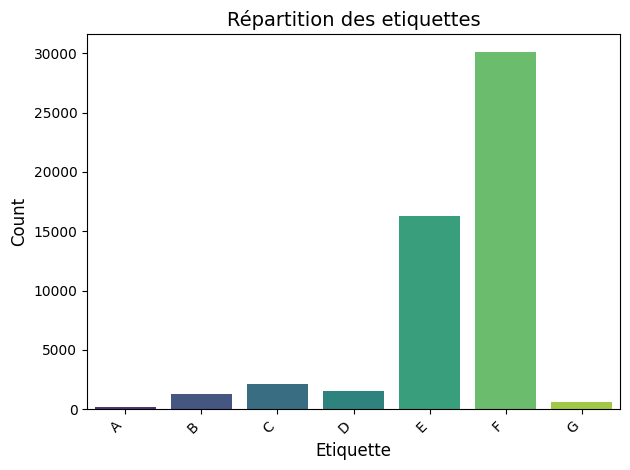

In [159]:
sns.countplot(data=df_without_Na, x ='etiquette', palette="viridis")
plt.xticks(rotation=45, fontsize=10, ha='right')  
plt.xlabel('Etiquette', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Répartition des etiquettes', fontsize=14) 
plt.tight_layout()
plt.show()
